## Dimension Reduction

#### *11 November 2019*

#### *DATA 1010*

In [1]:
using Pkg; Pkg.activate(".")

Activating environment at `~/Google Drive/DSI/Masters Program/DATA 1010/DATA1010-2019/class-exercises/11-11/Project.toml`


In [2]:
using Plots, Distributions, Images, Interact, LaTeXStrings

┌ Info: Recompiling stale cache file /Users/sswatson/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/sswatson/.julia/compiled/v1.2/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/sswatson/.julia/compiled/v1.2/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/sswatson/.julia/compiled/v1.2/Interact/XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1240


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2297750472093752071\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1212956888196931136\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2297750472093752071\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Problem 1

Think of some reasons it would be nice to be able to take a dataset with lots of features and map it to a dataset with very few features, like 2 or 3, while still preserving much of the structure of the original features.

*Solution*. 

## Problem 2

Come up with a scheme for taking a three-dimensional ellipsoidal point cloud and identifying the axes of the ellipsoid.

In [3]:
X = rand(MvNormal([0.0, 2, 1], [3.0 2 1; 2 2 0.5; 1 0.5 0.6]), 1000)'
plotlyjs()
scatter(X[:, 1], X[:, 2], X[:, 3], legend = false, ms = 1, msw = 0.5)

<!DOCTYPE html>
 
 
 Plots.jl

# Problem 3

Another way to map our training points to a lower-dimensional feature space is to try explicitly to preserve some specific structure of the dataset. For example, we can focus on which points are close to which points by connecting each point to the 3 points closest to it in the training set, and then treating the points as repelling particles and the connections as springs. Visit [Chris Olah's blog](https://colah.github.io/posts/2014-10-Visualizing-MNIST/) to see this approach in action (you can search "Visualizing MNIST as a Graph" to get there quickly). Note that there are both 2D and 3D examples shown there.

Look for a point in that dataset which sits among points of a different class. Mouse over it to see the image corresponding to that point; does it look more similar to the points it's clustered with than some other images of its class?

---

**t-SNE** is a more popular dimension reduction technique which takes the same general approach but is smoother and often more effective at identifying structure in the dataset. 

## Problem 4 

Let $P_{i,j}(\sigma) = \frac{\operatorname{e}^{-|\mathbf{x}_i - \mathbf{x}_j|^2/(2\sigma^2)}}{\sum_{k\neq j} \operatorname{e}^{-|\mathbf{x}_k - \mathbf{x}_j|^2/(2\sigma^2)}}$, if $i$ and $j$ are row indices of the feature matrix $X$. You can think of the values $\{P_{i,j}(\sigma)\}_{i=1}^n$ as "neighbor scores" for row $j$. The neighborliness of a point $\mathbf{x}_i$ depends on how close it is to $\mathbf{x}_j$, as measured by the Gaussian-shaped function $\mathbf{x} \mapsto \operatorname{e}^{-|\mathbf{x} - \mathbf{x}_j|^2/(2\sigma^2)}$. 

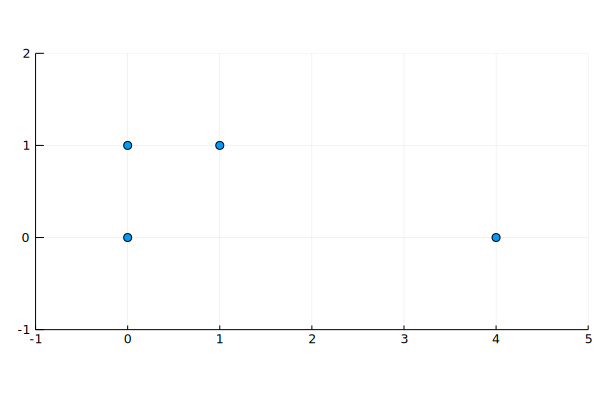

In [4]:
x = [[0,0],[0,1],[1,1],[4,0]]
scatter(map(Tuple, x), legend = false, xlims = (-1, 5), ylims = (-1, 2), ratio = 1)

In [5]:
f(x,y,σ) = exp(-norm(x-y)^2/(2σ^2))
P(x,i,j,σ) = i == j ? 0 : (f(x[i],x[j],σ) / sum(f(x[k],x[j],σ) for k in 1:length(x) if k ≠ j))
[P(x,2,1,σ) for σ in [0.25, 1, 2, 100]]

4-element Array{Float64,1}:
 0.9996646498695336
 0.6222451093055732
 0.4911948727783495
 0.3334222145344327

In [6]:
gr(fontfamily = "Palatino")
x = [[0,0],[0,1],[1,1],[4,0]]
disp(x) = string(round(x;digits=3))
xs(v) = slider(-1:0.05:10, value=v)
ys(v) = slider(-3:0.05:4, value=v)
@manipulate for σ in 0.25:0.05:3
    p1 = scatter(map(Tuple,x), legend = false, xlims = (-1, 5), 
                   ylims = (-1, 2), ratio = 1, marker_z = 1:4, size = (600, 400))
    annotate!(p1,[((x[i] + [0,0.4])..., disp(P(x,i,1,σ))) for i in 2:4])
    p1
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["σ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 56,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
28, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/sswatson/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001365fe890, Task (runnable) @0x00000001365fe890), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\",\"1.05\",\"1.1\",\"1.15\",\"1.2\",\"1.25\",\"1.3\",\"1.35\",\"1.4\",\"1.45\",\"1.5\",\"1.55\",\"1.6

## Problem 4

What will the neighbor scores of the other three points be (approximately) for the point $(0,1)$, when $\sigma$ is small? Check your prediction.

We're going to choose a separate $\sigma$ value for each row $j$. The goal is to choose $\sigma$ to achieve a good balance between putting too much emphasis on the nearest neighbors (as happens if $\sigma$ is small) and considering every point to be equally neighborly (if $\sigma$ is too large). To do that, we find a value of $\sigma$ that makes the **perplexity** $2^{-\sum_{i : i \neq j} P_{i,j}(\sigma) \log_2 P_{i,j}(\sigma)}$ approximately equal to some predetermined value (which is a hyperparameter of the model). 

---

## Problem 5

Plot the perplexity as a function of $\sigma$ for the small dataset above, with respect to the first point. 

---

Lastly, the t-SNE algorithm tries to choose the images of the points in such a way that the neighborliness relationships from the original dataset are as close as possible to being preserved. However, we'll measure neighborliness on the image side (in the new, lower-dimensional feature space) using the density function for the t-distribution, which is heavier-tailed function than the Gaussian:

$$
Q_{i,j} = \frac{(1 +
    |\tilde{\mathbf{x}}_i-\tilde{\mathbf{x}}_j|^2)^{-1}}{\sum_{k\neq j}(1 +
    |\tilde{\mathbf{x}}_k-\tilde{\mathbf{x}}_j|^2)^{-1}}.
$$

This second alteration was the innovation introduced by Maaten and Hinton in their 2008 paper introducing the technique. 

We measure how good a particular choices of images $\tilde{\mathbf{x}}_1, \ldots, \tilde{\mathbf{x}}_n$ is using the loss function
$$
\sum_{(i,j) : i \neq j} P_{i,j} \log_2 \frac{P_{i,j}}{Q_{i,j}}.
$$

## Problem 6

Adjust the locations of the points below to try to get the loss function value as small as possible.

In [7]:
gr(fontfamily = "Palatino")
f2(x) = 1/(1 + norm(x)^2)
q(x,i,j) = f2(x[i]-x[j])/sum(f2(x[k]-x[j]) for k in 1:4 if k ≠ j)
x = [[0,0],[0,1],[1,1],[4,0]]
disp(x) = string(round(x;digits=3))
xs(v) = slider(-1:0.05:10, value=v)
ys(v) = slider(-3:0.05:4, value=v)
@manipulate for x1 in xs(0), y1 in ys(0), x2 in xs(0), y2 in ys(1), x3 in xs(2), y3 in ys(1), x4 in xs(4), y4 in ys(0)
    σ = 1.8
    p1 = scatter(map(Tuple, x), legend = false, xlims = (-1, 5), ylims = (-1, 2), ratio = 1,
                 marker_z = 1:4, )
    annotate!(p1,[((x[i]+[0,0.4])...,disp(P(x,i,1,σ))) for i in 2:4])
    p2 = scatter([(x1,y1),(x2,y2),(x3,y3),(x4,y4)], legend = false, xlims = (-1, 10), 
                   ylims = (-3, 4), ratio = 1, marker_z = 1:4)
    x̃ = [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]
    annotate!(p2,[((x̃[i] + [0,0.4])..., disp(q(x̃,i,1))) for i in 2:4])
    annotate!(p2, [(5,3.5,"loss(1) = " * disp(sum(P(x,i,1,σ)*log2(P(x,i,1,σ)/q(x̃,i,1)) for i in 2:4)))])
    plot(p1, p2, size = (800, 300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 221,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
21, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/sswatson/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000134945f90, Task (runnable) @0x0000000134945f90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.95\",\"-0.9\",\"-0.85\",\"-0.8\",\"-0.75\",\"-0.7\",\"-0.65\",\"-0.6\",\"-0.55\",\"-0.5\",\"-0.45\",\"-0.4\",\"-0.35\",\"-0.3\",\"-0.25\",\"-0.2\",\"-0.15\",\"-0.1\",\"-0.05\",\"0.0\",\"0.05\",\"0.1\",\"0.15\",\"0.2\

---

## Problem 7 (Eigenfaces)

First, let us load the dataset. It consists of $165$ images of faces ($231 \times 195$ pixels) obtained from $15$ individuals. There are $11$ image per subject, consisting of different lighting conditions (illuminated from center, left or right), facial expressions (normal, sad, happy, sleepy, surprised or winking) and with or without glasses.

In [8]:
images = [float.(load("yale_faces/" * file)) for file in readdir("yale_faces") if endswith(file,".pgm")];

function imagedisplay(img)
    newimg = img / maximum(abs.(img))
    # if half or more of the pixel values are negative, flip the sign
    if mean(newimg .> 0) < 1/2
        sgn = -1
    else
        sgn = 1
    end
    Gray.(sgn .* newimg)
end

imagedisplay (generic function with 1 method)

In [9]:
@manipulate for k in 1:165
    imagedisplay(images[k])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 165,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
83, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/sswatson/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000119b12650, Task (runnable) @0x0000000119b12650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"3

(a) Show the mean of all 165 images.

(b) Use Interact to look at the first k principal components.

(c) Make a scatter plot of the original data points projected onto the span of the first two principal components. 

In [10]:
V[:,1:2]'

2×45045 Adjoint{Float64,Array{Float64,2}}:
 -1.21842e-5  1.1776e-5    0.000180459  …   0.00639419   0.00541057
  0.00062372  0.000736748  0.00151792      -0.003972    -0.00410024

In [11]:
#V[:,1:2] * (V[:,1:2]' * bigimagemat[1,:])
#V[:,1:2] * (V[:,1:2]' * bigimagemat[1,:])